<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/Copy_of_insurance_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install seaborn

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [ ]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Data_Science/insurance.csv"))
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
row,col = df.shape
print("No of rows = ",row)
print("No of cols = ",col)

No of rows =  1338
No of cols =  7


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
len(set(df['region']))

4

In [ ]:
# df = df.dropna()

In [ ]:
 # EDA

In [ ]:
auto=df[['age', 'sex', 'bmi', 'smoker','expenses']]

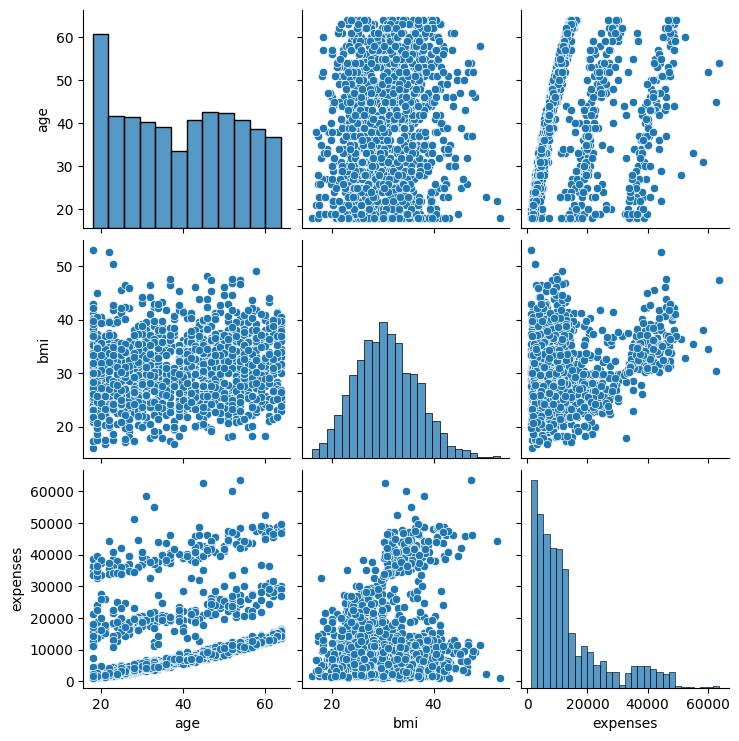

In [ ]:
sns.pairplot(auto)

In [ ]:
auto.corr()

<ipython-input-133-867f36f4b63d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


<ipython-input-134-d8314c1d3575>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(auto.corr(),annot=True)


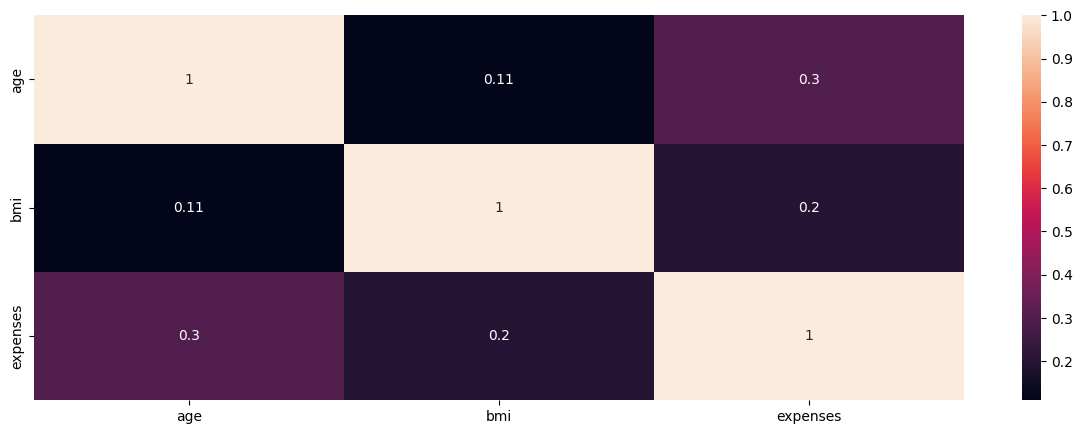

In [ ]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [ ]:
auto

,age,sex,bmi,smoker,expenses
0,19,female,27.9,yes,16884.92
1,18,male,33.8,no,1725.55
2,28,male,33.0,no,4449.46
3,33,male,22.7,no,21984.47
4,32,male,28.9,no,3866.86
...,...,...,...,...,...
1333,50,male,31.0,no,10600.55
1334,18,female,31.9,no,2205.98
1335,18,female,36.9,no,1629.83
1336,21,female,25.8,no,2007.95


In [ ]:
# Dimension reduction

In [ ]:
gender = pd.get_dummies(auto['sex'], drop_first = True)
gender

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [ ]:
auto = pd.concat([auto, gender], axis = 1)
auto

,age,sex,bmi,smoker,expenses,male
0,19,female,27.9,yes,16884.92,0
1,18,male,33.8,no,1725.55,1
2,28,male,33.0,no,4449.46,1
3,33,male,22.7,no,21984.47,1
4,32,male,28.9,no,3866.86,1
...,...,...,...,...,...,...
1333,50,male,31.0,no,10600.55,1
1334,18,female,31.9,no,2205.98,0
1335,18,female,36.9,no,1629.83,0
1336,21,female,25.8,no,2007.95,0


In [ ]:
smoker = pd.get_dummies(auto['smoker'], drop_first = False)
smoker

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [ ]:
# df.rename(columns= {'yes':'smoker_yes'})

In [ ]:
auto = pd.concat([auto, smoker], axis = 1)
auto

,age,sex,bmi,smoker,expenses,male,no,yes
0,19,female,27.9,yes,16884.92,0,0,1
1,18,male,33.8,no,1725.55,1,1,0
2,28,male,33.0,no,4449.46,1,1,0
3,33,male,22.7,no,21984.47,1,1,0
4,32,male,28.9,no,3866.86,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,no,10600.55,1,1,0
1334,18,female,31.9,no,2205.98,0,1,0
1335,18,female,36.9,no,1629.83,0,1,0
1336,21,female,25.8,no,2007.95,0,1,0


In [ ]:
auto = auto.drop(['sex','smoker'],axis = 1)
auto

,age,bmi,expenses,male,no,yes
0,19,27.9,16884.92,0,0,1
1,18,33.8,1725.55,1,1,0
2,28,33.0,4449.46,1,1,0
3,33,22.7,21984.47,1,1,0
4,32,28.9,3866.86,1,1,0
...,...,...,...,...,...,...
1333,50,31.0,10600.55,1,1,0
1334,18,31.9,2205.98,0,1,0
1335,18,36.9,1629.83,0,1,0
1336,21,25.8,2007.95,0,1,0


In [ ]:
auto.corr()

,age,bmi,expenses,male,no,yes
age,1.000000,0.109341,0.299008,-0.020856,0.025019,-0.025019
bmi,0.109341,1.000000,0.198576,0.046380,-0.003968,0.003968
expenses,0.299008,0.198576,1.000000,0.057292,-0.787251,0.787251
male,-0.020856,0.046380,0.057292,1.000000,-0.076185,0.076185
no,0.025019,-0.003968,-0.787251,-0.076185,1.000000,-1.000000
yes,-0.025019,0.003968,0.787251,0.076185,-1.000000,1.000000


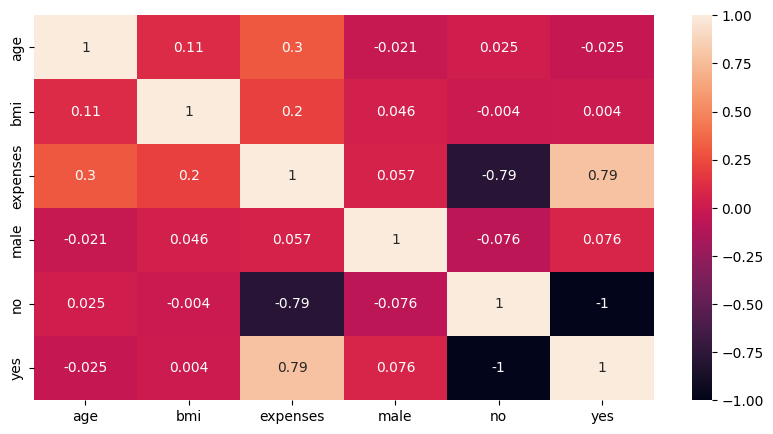

In [ ]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [ ]:
auto = auto.drop(['male'],axis = 1)
auto

,age,bmi,expenses,no,yes
0,19,27.9,16884.92,0,1
1,18,33.8,1725.55,1,0
2,28,33.0,4449.46,1,0
3,33,22.7,21984.47,1,0
4,32,28.9,3866.86,1,0
...,...,...,...,...,...
1333,50,31.0,10600.55,1,0
1334,18,31.9,2205.98,1,0
1335,18,36.9,1629.83,1,0
1336,21,25.8,2007.95,1,0


In [ ]:
auto.rename(columns= {'yes':'smoker_yes', 'no':'smoker_no'}, inplace =True)
#auto.drop(['sex','region','smoker'], axis=1, inplace =True)

In [ ]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [ ]:
df_train.shape

(1137, 5)

In [ ]:
df_test.shape

(201, 5)

In [ ]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['age','bmi',"smoker_no", "smoker_yes"]]

y_train = df_train['expenses']
df_test_predict = X_train.iloc[0:1]
# for linear regression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

#for logistic regression
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# model = lr.fit(X_train, y_train)

#for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
# Y_poly = poly_reg.fit_transform(y_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)
poly_reg.fit(X_train, y_train)

#model.predict(df_test_predict)

PolynomialFeatures(degree=7)

In [ ]:
data = df_test.iloc[20:21]
actual_expense = data['expenses']
data = data.drop(['expenses'],axis = 1)
data

,age,bmi,smoker_no,smoker_yes
315,52,33.3,1,0


In [ ]:
print("Predicted expenses",model.predict(data))
print("Actual expense",actual_expense)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but LinearRegression is expecting 330 features as input.

In [ ]:
# Testing
# data = df_test.iloc[50:51]
# actual_salary = data.pop('Salary')

# # # print(data)
# predicted_salary = pol_reg.predict(poly_reg.fit_transform(data))
# print("Actual Salary",actual_salary)
# print("predicted Salary",predicted_salary)

# print(df_test.iloc[0:1])
data

,age,bmi,smoker_no,smoker_yes
315,52,33.3,1,0


In [ ]:
# data = {'Age':[40],
#         'Years of Experience':[10.5],
#         "Bachelor's":[0],
#         "Master's":[0],
#         # "PhD":[1]}
# df = pd.DataFrame(data)
# predicted_salary = model.predict(df)
# # print("Actual Salary",actual_salary)
# print("predicted Salary",predicted_salary)

In [ ]:
y_train.shape

(1137,)

In [ ]:
model.predict(X_train).shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but LinearRegression is expecting 330 features as input.

In [ ]:
plt.scatter(y_train,model.predict(poly_reg.fit_transform(X_train)),color = 'red')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()